<a href="https://colab.research.google.com/github/kavita55/Data-Science-and-Business-Analytics-Spark-Foundation-Internship/blob/main/Task1_Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1: Prediction Using Supervised ML**

## __Author : Kavita  Mali__

##### __Objective : To predict the percentage of an student based on the no. of study hours.__

- This is a simple linear regression task as it involves just 2 variables.

## 1. Reading and Understanding the Data

#### 1.1 Importing Required Libraries

In [ ]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import library to supress warnings
import warnings
warnings.filterwarnings('ignore')

#### 1.2 Reading the Dataset 

In [ ]:
#Loading dataset
data_score = pd.read_csv("http://bit.ly/w-data")
data_score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#Checking the shape of the dataset
data_score.shape

(25, 2)

In [ ]:
#Checking the summary of data
data_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## 2. Visualising the Data

**Let's plot scatter plot to check the relationship between the independent and dependent variable**

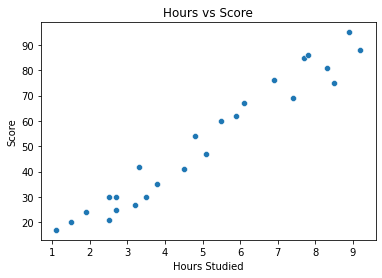

In [ ]:
# PLotting scatterplot
sns.scatterplot(x = 'Hours', y = 'Scores' , data = data_score)
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
plt.show()

From above chart, we can say that there is a positive linear relationship between dependent and independent variable.

## 3. Performing Simple Linear Regression using Statsmodels

>- Importing required libraries for the modelling


In [ ]:
#Importing required libraries for the modelling
from sklearn.model_selection import train_test_split   # to split the dataframe
import statsmodels.api as sm                           # Statsmodel library
from sklearn.metrics import mean_squared_error          # metric for evaluation
from sklearn.metrics import r2_score

In [ ]:
#Assigning X and y
X = data_score['Hours']
y = data_score['Scores']

In [ ]:
# Splitting the data set into train and test sets using scikit library
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


> #### 3.1 Building a Linear Model

In [ ]:
#Adding a constant to get an intercept 
X_train_sm = sm.add_constant(X_train)

#Fit the regression line using 'OLS'
lr = sm.OLS(y_train , X_train_sm).fit()


In [ ]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print( lr.summary() )

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Sun, 02 May 2021   Prob (F-statistic):           1.15e-11
Time:                        18:21:46   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.6

<br>

The values we are concerned with are -

The coefficients and significance (p-values)
R-squared
F statistic and its significance
1. The coefficient for Hours is 9.87, with a very low p value.<br>
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.957
Meaning that 95.7% of the variance in Scores is explained by Hours.

This is a decent R-squared value.

3. F statistic has a very low p value (practically low)<br>

Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

From the parameters that we get, our linear regression equation becomes:

__Scores = 1.49 + 9.87 × TV__

 > #### 3.2 Visualize how well the model fit the data.

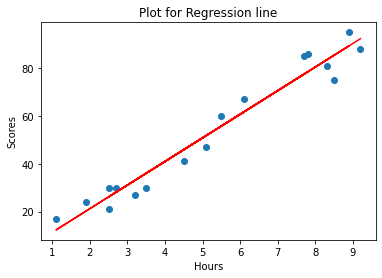

In [ ]:
# Plotting the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.49 + 9.87*X_train, 'r')
plt.title("Plot for Regression line")
plt.xlabel('Hours')
plt.ylabel("Scores")
plt.show()

- Predicting y_train values using linear regression model

In [ ]:
#predicting 
y_train_pred = lr.predict(X_train_sm)


- __Plotting the regression line using predicted values__


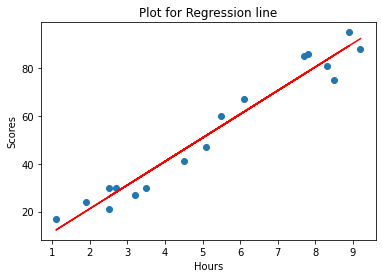

In [ ]:
# Plotting the regression line using predicted values
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.title("Plot for Regression line")
plt.xlabel('Hours')
plt.ylabel("Scores")
plt.show()

# 4. Predictions on Test data set




> #### 4.1 Predicting y values for test set

In [ ]:
#Adding constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)


> #### 4.2 Visualizing regression line for the test data set


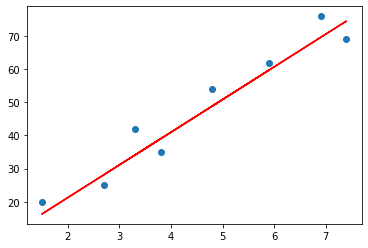

In [ ]:
#Visualizing regression line for the test data set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')
plt.show()

- __Let's Compare Actual vs Predicted values__

In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


# 5. Model Evaluation

> #### 5.1 Evaluate model using Mean Squared Error

In [ ]:
#Returns the mean squared error; we'll take a square root
print( "Mean Squared Error :" ,np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error : 5.067387845160845


In [ ]:
## Mean Absollute Error
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.762517892332275
